In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt , seaborn as sns


## EDA on Loan Data & Credit Risk Analysis
This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

In [2]:
app_data = pd.read_csv('application_data.csv')
pred = pd.read_csv('previous_application.csv')

In [3]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pred.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### There was an encoding error in the 'columns_description.csv' from the start.
#### The following process solved the process

In [5]:
import chardet

with open('columns_description.csv' , 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [6]:
cold = pd.read_csv('columns_description.csv' , encoding = 'Windows-1252')

In [7]:
cold.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


## 1. Checking The Shapes Of The Following Data Sets

In [8]:
# application_data
app_data.shape

(307511, 122)

In [9]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
# previous_application
pred.shape

(1670214, 37)

In [11]:
pred.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [12]:
# columns_description
cold.shape

(160, 5)

In [13]:
cold.columns

Index(['Unnamed: 0', 'Table', 'Row', 'Description', 'Special'], dtype='object')

## 2. Application Data :  
     
##     DATA CLEANING AND REPLACING MISSING VALUES

In [14]:
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [15]:
# Finding the % of missing values
null_data = (app_data.isnull().sum() / len(app_data)) * 100
null_data

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [16]:
null_data.value_counts()

0.000000     55
13.501631     6
0.332021      4
49.760822     3
66.497784     3
55.179164     3
69.432963     3
50.193326     3
68.354953     3
59.376738     3
67.848630     3
53.295980     3
69.872297     3
50.348768     3
48.781019     3
50.749729     3
58.515956     3
68.386172     1
0.000325      1
65.990810     1
47.398304     1
50.840783     1
48.268517     1
50.176091     1
31.345545     1
0.000650      1
56.381073     1
0.214626      1
19.825307     1
0.420148      1
0.003902      1
0.090403      1
dtype: int64

In [17]:
# applying threshold
threshold = 40
drop_col1 = null_data[ null_data > threshold].index

In [18]:
drop_col1.size

49

In [19]:
app_data1 = app_data.drop(columns = drop_col1)

In [20]:
app_data1.shape

(307511, 73)

In [21]:
app_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# checking for other insignificant columns
# defining a threshold for columns with mostly 0
zero_thres = 0.8

zero_percentage = (app_data1 == 0).sum() / len(app_data1)

In [23]:
cols = zero_percentage[zero_percentage >= zero_thres].index
cols

Index(['TARGET', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK'],
      dtype='object')

In [24]:
# dropping the columns
app_data1 = app_data1.drop(columns = cols)

In [25]:
app_data1.shape

(307511, 41)

In [26]:
app_data1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Business Entity Type 3,0.262949,0.139376,2.0,2.0,-1134.0,1,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,School,0.622246,NaN,1.0,1.0,-828.0,1,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Government,0.555912,0.729567,0.0,0.0,-815.0,0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,Business Entity Type 3,0.650442,NaN,2.0,2.0,-617.0,1,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,Religion,0.322738,NaN,0.0,0.0,-1106.0,0,0.0,0.0,0.0


In [27]:
# converting columns with negative values to their absolute values

In [28]:
app_data1['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [29]:
app_data1['DAYS_LAST_PHONE_CHANGE'] = app_data1['DAYS_LAST_PHONE_CHANGE'].abs() 

In [30]:
app_data1['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [31]:
cols_convert = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

In [32]:
app_data1[cols_convert] = app_data1[cols_convert].abs()

In [33]:
app_data1[cols_convert].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373
std,4363.988632,139443.751806,3522.886321,1509.450419
min,7489.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000
max,25229.000000,365243.000000,24672.000000,7197.000000


In [34]:
# checking in for the null values in each column

In [35]:
app_data1.isnull().sum().sort_values(ascending = False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
OBS_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_3                    0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
ORGANIZATION_TYPE                  0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_WORK_CITY             0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
SK_ID_CURR                         0
FLAG_EMP_PHONE                     0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
F

In [36]:
app_data1 = app_data1[~app_data1['DAYS_LAST_PHONE_CHANGE'].isnull()]

In [37]:
app_data1['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [38]:
app_data1 = app_data1[~app_data1['CNT_FAM_MEMBERS'].isnull()]

In [39]:
app_data1['CNT_FAM_MEMBERS'].isnull().sum()

0

In [40]:
app_data1 = app_data1[~app_data1['AMT_ANNUITY'].isnull()]

In [41]:
app_data1['AMT_ANNUITY'].isnull().sum()

0

In [42]:
app_data1 = app_data1[~app_data1['AMT_GOODS_PRICE'].isnull()]

In [43]:
app_data1['AMT_GOODS_PRICE'].isnull().sum()

0

In [44]:
app_data1 = app_data1[~app_data1['EXT_SOURCE_2'].isnull()]

In [45]:
app_data1['EXT_SOURCE_2'].isnull().sum()

0

In [46]:
app_data1 = app_data1[~app_data1['OBS_30_CNT_SOCIAL_CIRCLE'].isnull()]

In [47]:
app_data1['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [48]:
app_data1 = app_data1[~app_data1['OBS_60_CNT_SOCIAL_CIRCLE'].isnull()]

In [49]:
app_data1['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [50]:
app_data1 = app_data1[~app_data1['NAME_TYPE_SUITE'].isnull()]

In [51]:
app_data1['NAME_TYPE_SUITE'].isnull().sum()

0

In [52]:
app_data1 = app_data1[~app_data1['AMT_REQ_CREDIT_BUREAU_QRT'].isnull()]

In [53]:
app_data1['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [54]:
app_data1 = app_data1[~app_data1['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull()]

In [55]:
app_data1['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [56]:
app_data1 = app_data1[~app_data1['AMT_REQ_CREDIT_BUREAU_MON'].isnull()]

In [57]:
app_data1['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [58]:
app_data1 = app_data1[~app_data1['EXT_SOURCE_3'].isnull()]

In [59]:
app_data1['EXT_SOURCE_3'].isnull().sum()

0

In [60]:
app_data1 = app_data1[~app_data1['OCCUPATION_TYPE'].isnull()]

In [61]:
app_data1['OCCUPATION_TYPE'].isnull().sum()

0

In [62]:
app_data1.isnull().sum().sort_values(ascending = False)

SK_ID_CURR                     0
FLAG_EMP_PHONE                 0
FLAG_PHONE                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
OBS_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_3                0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
FLAG_CONT_MOBILE               0
FLAG_MOBIL                     0
NAME_CONTRACT_TYPE             0
DAYS_ID_PUBLISH                0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_

In [63]:
app_data1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Business Entity Type 3,0.262949,0.139376,2.0,2.0,1134.0,1,0.0,0.0,1.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Government,0.555912,0.729567,0.0,0.0,815.0,0,0.0,0.0,0.0
5,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,Other,0.354225,0.621226,0.0,0.0,2536.0,1,0.0,1.0,1.0
6,100009,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,Business Entity Type 3,0.724000,0.492060,1.0,1.0,1562.0,0,1.0,1.0,2.0
7,100010,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,Other,0.714279,0.540654,2.0,2.0,1070.0,1,0.0,0.0,0.0


## 3. Previous Application Data
## DATA CLEANING AND REPLACING MISSING VALUES

In [64]:
pred.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
pred.shape

(1670214, 37)

In [66]:
pred.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [67]:
# Finding the % of missing values
null_data1 = (pred.isnull().sum()/len(pred)) * 100
null_data1

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [68]:
# Applying threshold
threshold = 40
drop_col2 = null_data1[null_data1 > threshold].index

In [69]:
drop_col2.size

11

In [70]:
pred1 = pred.drop(columns = drop_col2)

In [71]:
pred1.shape

(1670214, 26)

In [72]:
pred1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [73]:
# checking for other insignificant columns
pred1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [74]:
# unnecessary columns
cols2 = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']

In [75]:
pred1 = pred1.drop(columns = cols2)
pred1.shape

(1670214, 22)

In [76]:
pred1.head(25)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Everyday expenses,Approved,-684,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,-14,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,-21,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,-386,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,XNA,Canceled,-57,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [77]:
# converting the columns with negative values to their absolute values
cols_convert2 = ['DAYS_DECISION','SELLERPLACE_AREA']

In [78]:
pred1[cols_convert2] = pred1[cols_convert2].abs()

In [79]:
pred1['DAYS_DECISION'].describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

In [80]:
pred1['SELLERPLACE_AREA'].describe()

count    1.670214e+06
mean     3.148644e+02
std      7.127403e+03
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

In [81]:
pred1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,...,Repeater,XNA,Cash,x-sell,Contact center,1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,24.0,high,Cash Street: high


In [82]:
# checking in for the null values in each column
pred1.isnull().sum().sort_values(ascending = False)

AMT_GOODS_PRICE           385515
AMT_ANNUITY               372235
CNT_PAYMENT               372230
PRODUCT_COMBINATION          346
AMT_CREDIT                     1
NAME_GOODS_CATEGORY            0
NAME_YIELD_GROUP               0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
SK_ID_PREV                     0
NAME_CLIENT_TYPE               0
SK_ID_CURR                     0
NAME_PAYMENT_TYPE              0
DAYS_DECISION                  0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
AMT_APPLICATION                0
NAME_CONTRACT_TYPE             0
CODE_REJECT_REASON             0
dtype: int64

In [83]:
pred1 = pred1[~pred1['AMT_CREDIT'].isnull()]

In [84]:
pred1['AMT_CREDIT'].isnull().sum()

0

In [85]:
pred1 = pred1[~pred1['PRODUCT_COMBINATION'].isnull()]

In [86]:
pred1['PRODUCT_COMBINATION'].isnull().sum()

0

In [87]:
pred1 = pred1[~pred1['CNT_PAYMENT'].isnull()]

In [88]:
pred1['CNT_PAYMENT'].isnull().sum()

0

In [89]:
pred1 = pred1[~pred1['AMT_ANNUITY'].isnull()]

In [90]:
pred1['AMT_ANNUITY'].isnull().sum()

0

In [91]:
pred1 = pred1[~pred1['AMT_GOODS_PRICE'].isnull()]

In [92]:
pred1['AMT_GOODS_PRICE'].isnull().sum()

0

In [93]:
pred1.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                0
AMT_GOODS_PRICE           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
NAME_PRODUCT_TYPE         0
CHANNEL_TYPE              0
SELLERPLACE_AREA          0
NAME_SELLER_INDUSTRY      0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION       0
dtype: int64

In [94]:
pred1.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,...,Repeater,XNA,Cash,x-sell,Contact center,1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Everyday expenses,Approved,684,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,18.0,low_normal,Cash X-Sell: low
10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,270000.0,XNA,Approved,735,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,54.0,low_normal,Cash X-Sell: low
11,2257824,161140,Cash loans,13832.775,211500.0,246397.5,211500.0,XNA,Approved,815,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,30.0,middle,Cash X-Sell: middle
12,2330894,258628,Cash loans,12165.210,148500.0,174361.5,148500.0,XNA,Approved,860,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,24.0,high,Cash X-Sell: high
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,53779.5,XAP,Approved,408,...,New,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,8.0,low_action,POS household without interest


## 4. Analysing & Merging Both Datasets

#### app_data1 : check the dtypes and compare it with pred1

In [95]:
app_data1.select_dtypes(include = ['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [96]:
app_data1.select_dtypes(exclude = ['object']).columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [97]:
pred1.select_dtypes(include = ['object']).columns

Index(['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [98]:
pred1.select_dtypes(exclude = ['object']).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [99]:
merged_data = pd.merge(app_data1 , pred1 , on = 'SK_ID_CURR' , how = 'inner')

In [100]:
merged_data.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
2,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,110,Consumer electronics,10.0,low_normal,POS household with interest
3,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,New,Mobile,POS,XNA,Country-wide,50,Connectivity,6.0,low_normal,POS mobile with interest
4,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,Refreshed,XNA,Cash,x-sell,Country-wide,110,Consumer electronics,30.0,middle,Cash X-Sell: middle
5,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,Repeater,Gardening,POS,XNA,Regional / Local,96,Consumer electronics,10.0,low_normal,POS household with interest
6,100009,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164,Consumer electronics,12.0,low_action,POS household without interest
7,100009,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,Repeater,Mobile,POS,XNA,Country-wide,18,Connectivity,6.0,high,POS mobile with interest
8,100009,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,Repeater,Photo / Cinema Equipment,POS,XNA,Regional / Local,164,Consumer electronics,6.0,middle,POS household with interest
9,100009,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,Repeater,Mobile,POS,XNA,Regional / Local,164,Consumer electronics,6.0,high,POS household with interest


## 5. Handling Outliers

In [101]:
merged_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', 'NAME_CONTRAC

#### CHILDREN

In [102]:
merged_data['CNT_CHILDREN'].describe()

count    592142.000000
mean          0.513198
std           0.774391
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [103]:
merged_data['CNT_CHILDREN'] = merged_data['CNT_CHILDREN'].astype(int) 

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


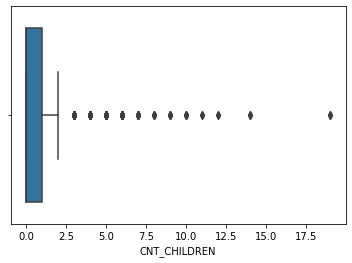

In [104]:
sns.boxplot(merged_data['CNT_CHILDREN'])
plt.show()

#### From the graph above, it can be observed that their is clearly an outlier with more children than the rest of the families. This outlier needs to be handled because it can impact the analysis of the overall group

#### TOTAL INCOME

In [105]:
merged_data['AMT_INCOME_TOTAL'].describe()

count    5.921420e+05
mean     1.815889e+05
std      2.364112e+05
min      2.655000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


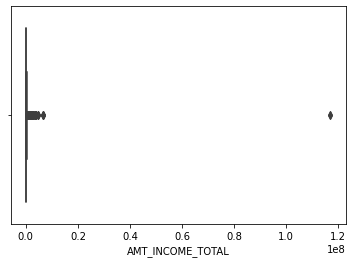

In [106]:
sns.boxplot(merged_data['AMT_INCOME_TOTAL'])
plt.show()

#### From the graph , it can be observed that there is an outlier with far more income than rest of the people. Indicates high income professionals. Understanding and analysing this distribution can tailor furnish credit risk and draw insights on customer capabilities on borrowing and paying the loan

#### FAMILY MEMBERS

In [107]:
merged_data['CNT_FAM_MEMBERS'].describe()

count    592142.000000
mean          2.290824
std           0.938514
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


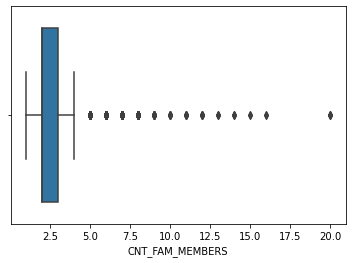

In [108]:
sns.boxplot(merged_data['CNT_FAM_MEMBERS'])
plt.show()

#### From the graph above , it can be observed their is clearly an outlier with 20 members in the family and others with a majority of 3 or 4 members. These outliers may represent multi-generational households or joint families and analysing these outiers allows for tailored loan offering that consider the financial dynamics of large households. For example in the 20 member family , if there is just one or two individuals earning, then chances of paying the loan back is less. Whereas if there are 4 or more occupants, they are more likely to not default on the loan. 

#### DAYS EMPLOYED

In [109]:
merged_data['DAYS_EMPLOYED'].describe()

count    592142.000000
mean       2533.039865
std        2365.017356
min           0.000000
25%         881.000000
50%        1824.000000
75%        3358.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


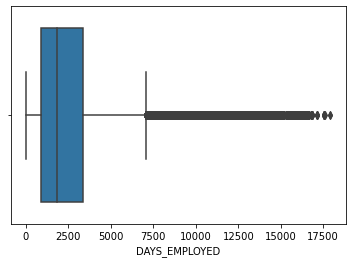

In [110]:
sns.boxplot(merged_data['DAYS_EMPLOYED'])
plt.show()

#### Days Employed outliers suggest some individuals have been employed for an unusually long time. This may indicate stable employment and lower risk of job loss. So their chances of defaulting on a loan is highly unlikely. 

## 6. Analyse Data Imbalance

Here we will take the 'target' column from the application dataset to observe the ratio between defaulters and non-defaulters.

In [111]:
app_data['TARGET'].value_counts(normalize = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

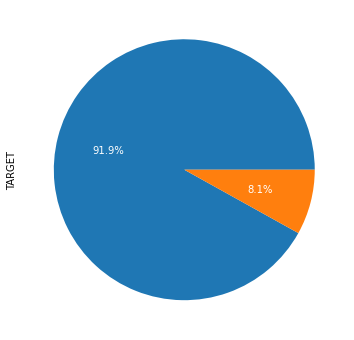

In [112]:
plt.figure(figsize = [7,6])

app_data['TARGET'].value_counts(normalize = True).plot.pie(autopct = '%1.1f%%',textprops = {'color':'White'})
plt.show()

#### 0 shows the non-defaulters and 1 shows the Defaulters
#### Clearly , it can be observed that 8.1% are Defaulters and 91.9% are non-defaulters

## 7. Perform Univariate , Segmented Univariate and Bivariate Analysis


Will be taking 'TARGET' from application data as the target variable

In [113]:
merged_data = pd.concat([merged_data , app_data['TARGET']] , axis = 1)

In [114]:
merged_data['TARGET'].value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

### Gender Type By Target

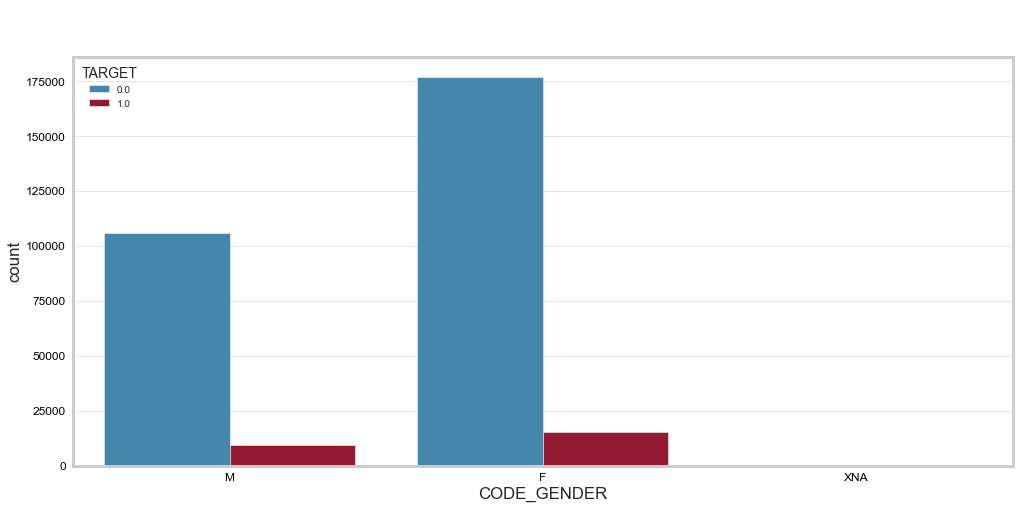

In [137]:
plt.figure(figsize = [15,7])
sns.set_style('whitegrid')

sns.countplot( data = merged_data , x = 'CODE_GENDER' , hue = 'TARGET')
plt.xticks(fontsize = 12 , c = 'black')
plt.yticks(fontsize = 12 , c = 'black')
plt.title('Gender Type By Target \n' , fontsize = 25 , c = 'White')
plt.show()

### Education Type By Target

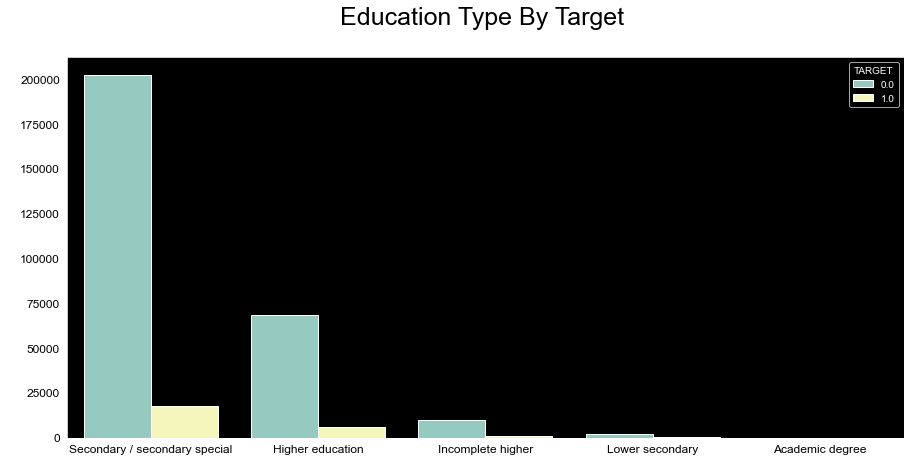

In [116]:
plt.figure(figsize = [15,7])
plt.style.use('dark_background')

sns.countplot( data = merged_data , x = 'NAME_EDUCATION_TYPE' , hue = 'TARGET')
plt.title('Education Type By Target \n' , fontsize = 25 , color = 'Black')
plt.xticks(fontsize = 12 , c = 'Black')
plt.yticks(fontsize = 12 , c = 'Black')
plt.show()

### Income Type By Target & Gender

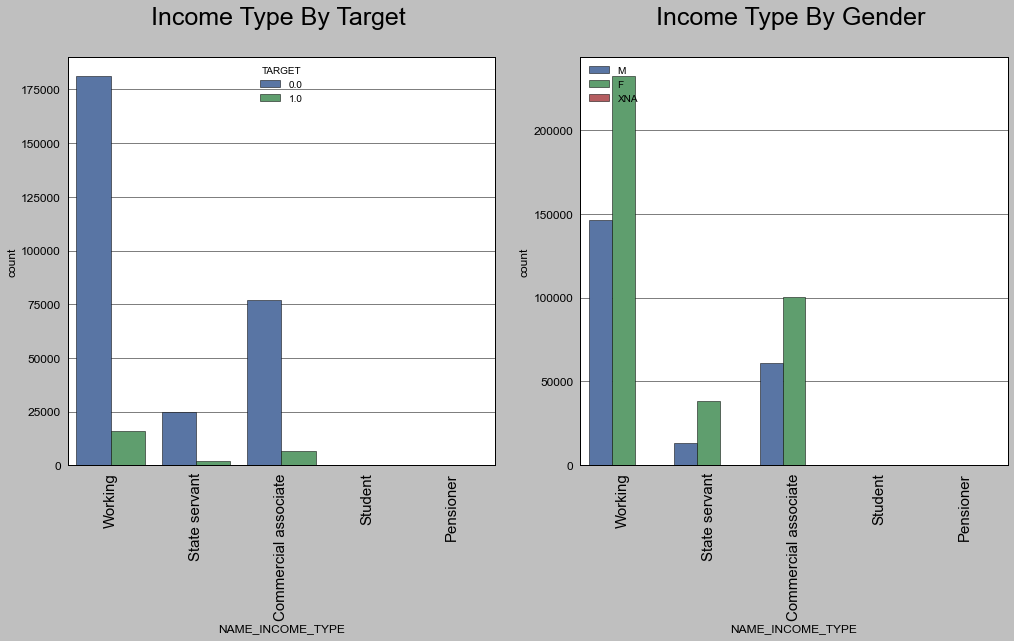

In [146]:

plt.figure(figsize = [15,7])
plt.style.use('seaborn-deep')

plt.subplot(1,2,1)
sns.countplot( data = merged_data , x = 'NAME_INCOME_TYPE' , hue = 'TARGET')
plt.title( 'Income Type By Target \n' , fontsize = 25)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 12)

plt.subplot(1,2,2)
sns.countplot( data = merged_data , x = 'NAME_INCOME_TYPE' , hue = 'CODE_GENDER')
plt.title('Income Type By Gender \n' , fontsize = 25)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

### Name Type Suite By Target

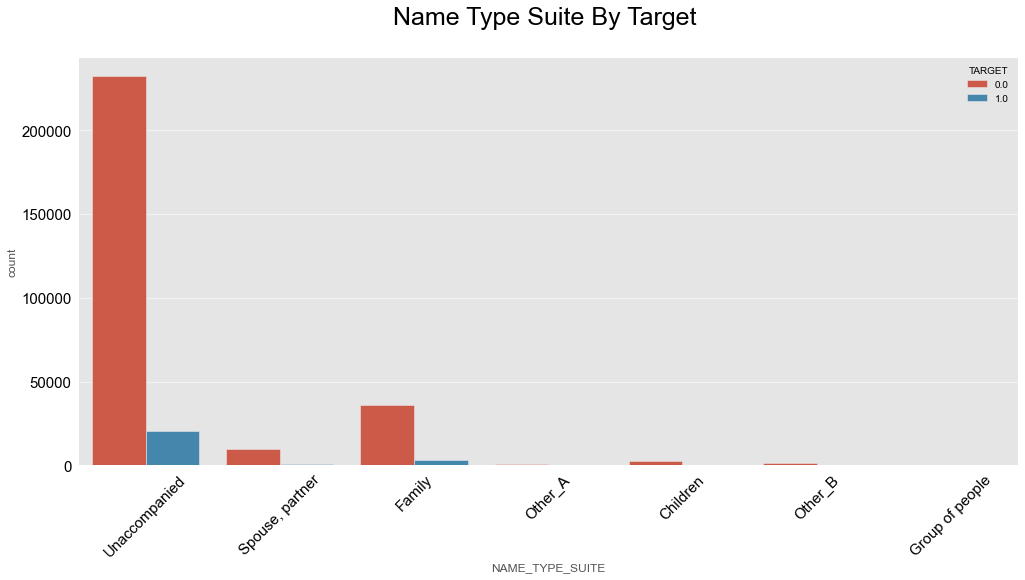

In [157]:

plt.figure(figsize = [15,7])
plt.style.use('ggplot')

sns.countplot( data = merged_data , x = 'NAME_TYPE_SUITE' , hue = 'TARGET')
plt.title('Name Type Suite By Target \n' , fontsize = 25)
plt.xticks(rotation = 45 , fontsize = 15 , c = 'black')
plt.yticks(fontsize = 15 , c = 'black')
plt.show()

### Housing Type By Target

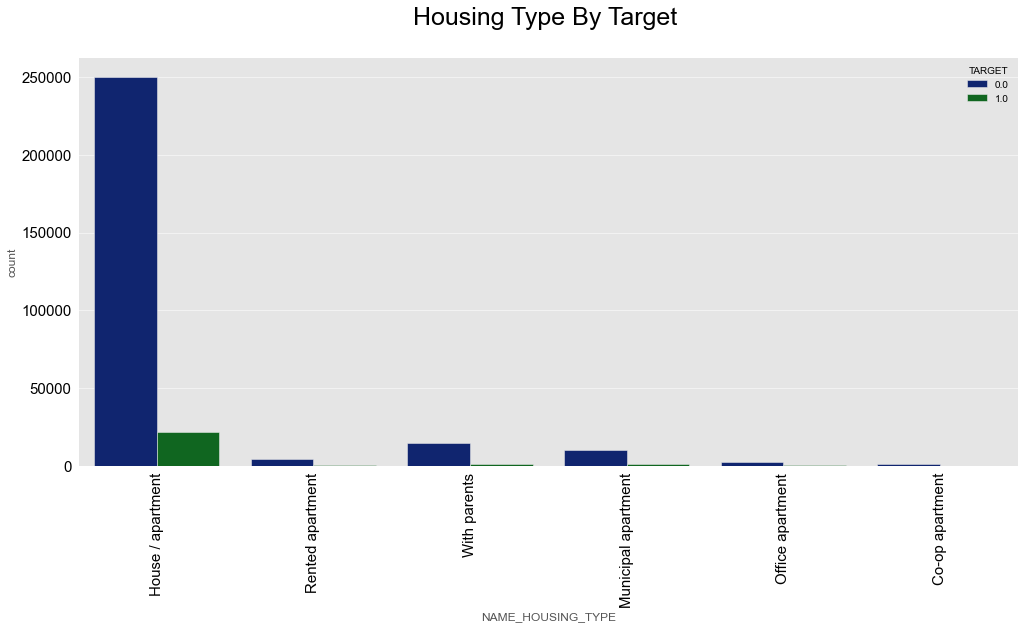

In [158]:

plt.figure(figsize = [15,7])
plt.style.use('seaborn-dark-palette')

sns.countplot( data = merged_data , x = 'NAME_HOUSING_TYPE' , hue = 'TARGET')
plt.xticks(rotation = 90 ,fontsize = 15 , c = 'black')
plt.yticks(fontsize = 15 , c = 'black')
plt.title('Housing Type By Target \n' , fontsize = 25)
plt.show()

### Family Status By Target

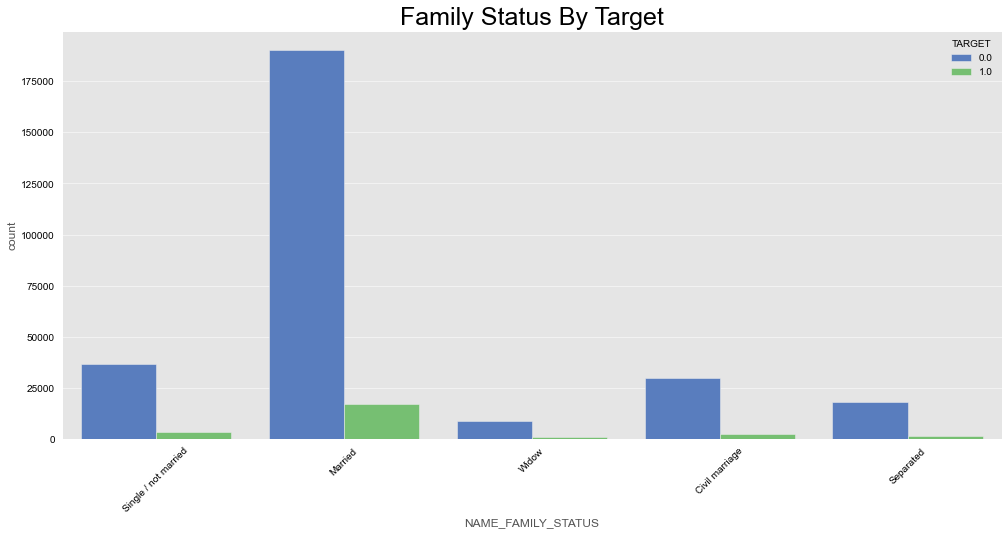

In [159]:
plt.figure(figsize = [15,7])
plt.style.use('seaborn-muted')

sns.countplot( data = merged_data , x = 'NAME_FAMILY_STATUS' , hue = 'TARGET')
plt.xticks(rotation = 45 , c = 'black')
plt.yticks(c = 'black')
plt.title('Family Status By Target' , fontsize = 25)
plt.show()


### Occupation Type By Target

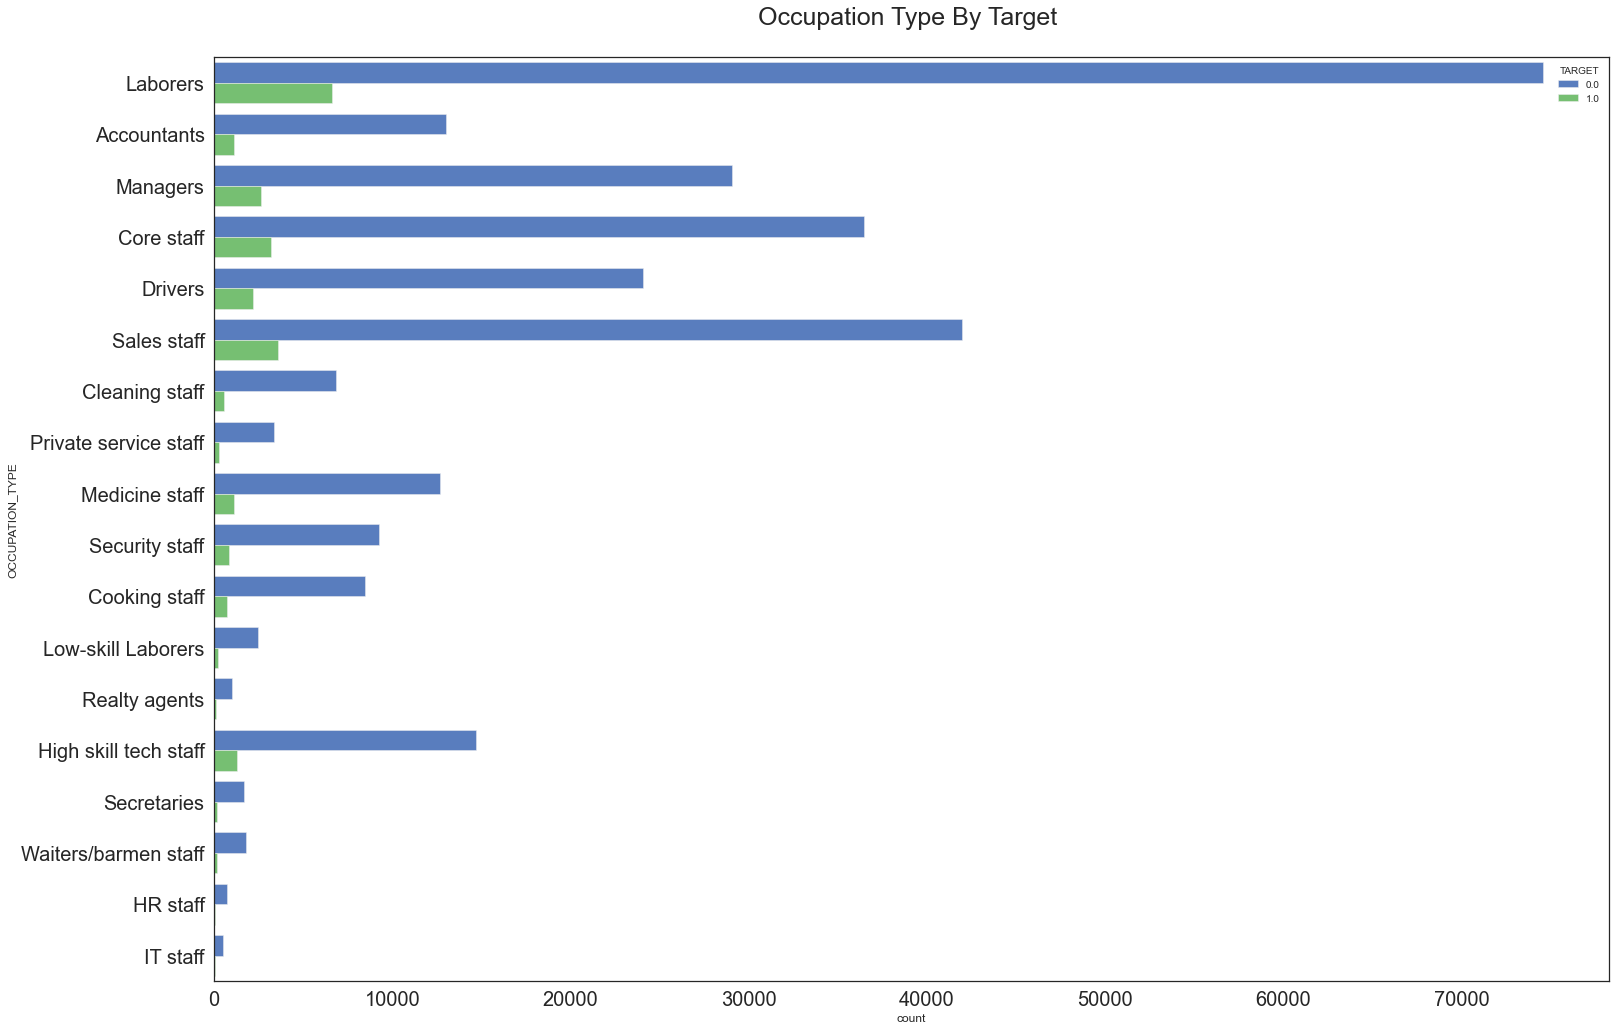

In [121]:
plt.figure(figsize = [25,17])
plt.style.use('seaborn-ticks')

sns.countplot( data = merged_data , y = 'OCCUPATION_TYPE' , hue = 'TARGET')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.title('Occupation Type By Target \n' , fontsize = 25)
plt.show()

### Contract Type By Target

In [122]:
merged_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', 'NAME_CONTRAC

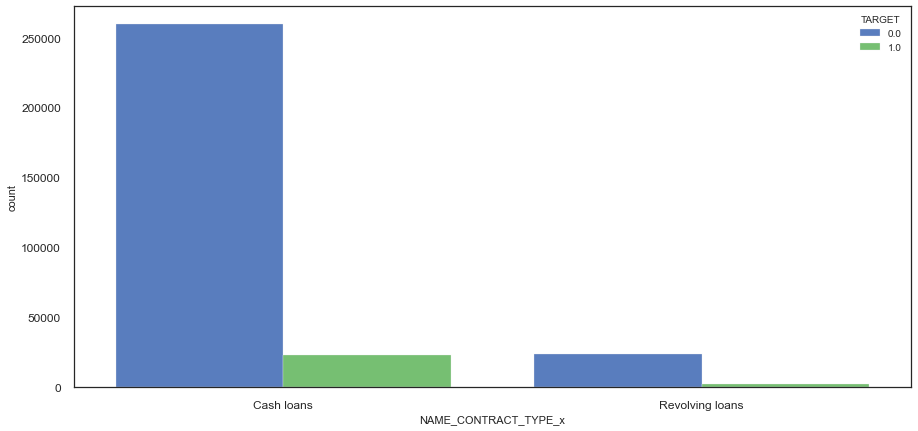

In [123]:
plt.figure(figsize = [15,7])
plt.style.use('seaborn-notebook')

sns.countplot( data = merged_data , x = 'NAME_CONTRACT_TYPE_x' , hue = 'TARGET')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

### Organization Type By Target

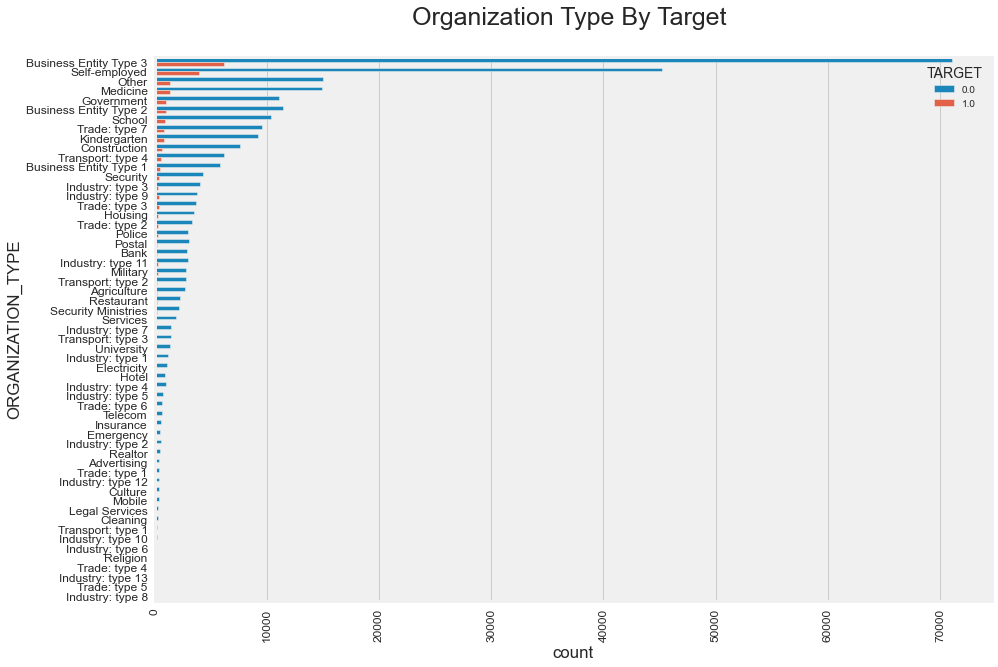

In [124]:
plt.figure(figsize = [15,10])
plt.style.use('fivethirtyeight')

sns.countplot( data = merged_data , y = 'ORGANIZATION_TYPE' , order = merged_data['ORGANIZATION_TYPE'].value_counts().index ,  hue = 'TARGET')
plt.xticks(rotation = 90 , fontsize = 12)
plt.yticks(fontsize = 12)
plt.title( 'Organization Type By Target \n' , fontsize = 25)
plt.show()

### Own Car By Target

In [125]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

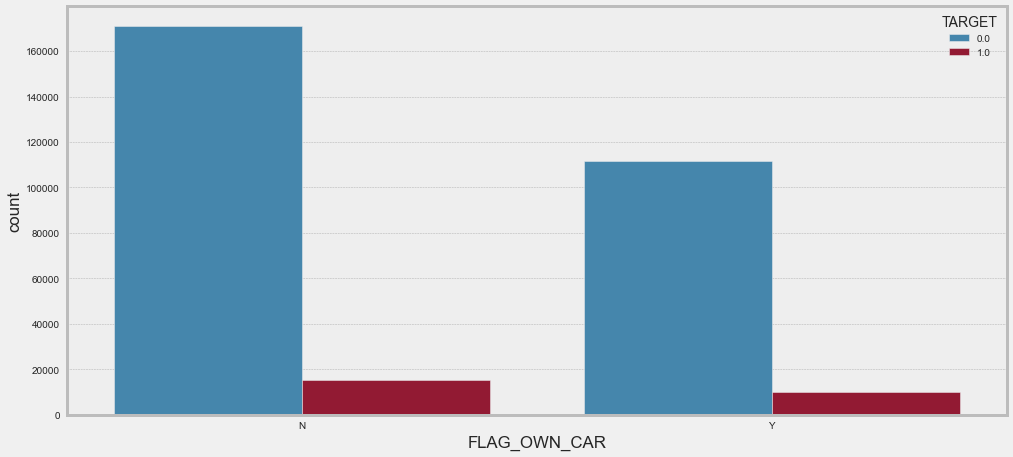

In [126]:
plt.figure(figsize = [15,7])
plt.style.use('bmh')

sns.countplot( data = merged_data , x = 'FLAG_OWN_CAR' , hue = 'TARGET')
plt.show()

# Creating Correlation Charts

In [127]:
app_data1.dtypes.value_counts()

float64    15
int64      14
object     12
dtype: int64

In [128]:
app_data1['TARGET'] = app_data['TARGET']

In [129]:
app_data1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.262949,0.139376,2.0,2.0,1134.0,1,0.0,0.0,1.0,1
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.555912,0.729567,0.0,0.0,815.0,0,0.0,0.0,0.0,0
5,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0.354225,0.621226,0.0,0.0,2536.0,1,0.0,1.0,1.0,0
6,100009,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,0.724000,0.492060,1.0,1.0,1562.0,0,1.0,1.0,2.0,0
7,100010,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0.714279,0.540654,2.0,2.0,1070.0,1,0.0,0.0,0.0,0


In [130]:
Numerical_var = app_data1.select_dtypes(include = ['float64','int64']).columns
Numerical_col = app_data1[Numerical_var]
credit_risk = Numerical_col[Numerical_col['TARGET'] == 1]
No_credit_risk = Numerical_col[Numerical_col['TARGET'] == 0]


In [147]:
credit_risk.head(10)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,0.262949,0.139376,2.0,2.0,1134.0,1,0.0,0.0,1.0,1
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,...,0.548477,0.190706,10.0,10.0,161.0,1,0.0,2.0,2.0,1
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,...,0.306841,0.320163,0.0,0.0,1075.0,1,2.0,0.0,4.0,1
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,...,0.674203,0.399676,1.0,1.0,1480.0,1,0.0,0.0,2.0,1
110,100130,1,157500.0,723996.0,30802.5,585000.0,0.007274,10526,267,387.0,...,0.282069,0.120641,0.0,0.0,56.0,1,0.0,0.0,0.0,1
138,100160,0,292500.0,675000.0,36747.0,675000.0,0.035792,16667,200,5239.0,...,0.631961,0.289611,0.0,0.0,106.0,0,0.0,0.0,0.0,1
154,100181,0,157500.0,245619.0,12667.5,166500.0,0.022625,17538,7676,774.0,...,0.182171,0.443615,0.0,0.0,216.0,1,0.0,0.0,6.0,1
163,100192,0,111915.0,225000.0,21037.5,225000.0,0.018801,7989,150,2570.0,...,0.086253,0.513694,0.0,0.0,122.0,0,0.0,0.0,0.0,1
180,100209,3,180000.0,540000.0,27000.0,540000.0,0.024610,15326,1038,782.0,...,0.372110,0.506484,0.0,0.0,429.0,0,0.0,0.0,2.0,1
211,100246,0,135000.0,495216.0,26995.5,427500.0,0.008019,12824,154,6764.0,...,0.044021,0.243186,0.0,0.0,309.0,1,0.0,0.0,0.0,1


In [148]:
No_credit_risk.head(10)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0.555912,0.729567,0.0,0.0,815.0,0,0.0,0.0,0.0,0
5,100008,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,...,0.354225,0.621226,0.0,0.0,2536.0,1,0.0,1.0,1.0,0
6,100009,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,13778,3130,1213.0,...,0.724000,0.492060,1.0,1.0,1562.0,0,1.0,1.0,2.0,0
7,100010,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,18850,449,4597.0,...,0.714279,0.540654,2.0,2.0,1070.0,1,0.0,0.0,0.0,0
10,100014,1,112500.0,652500.0,21177.0,652500.0,0.022800,10197,679,4427.0,...,0.651862,0.363945,0.0,0.0,844.0,1,1.0,0.0,0.0,0
12,100016,0,67500.0,80865.0,5881.5,67500.0,0.031329,13439,2717,311.0,...,0.715042,0.176653,0.0,0.0,2370.0,1,1.0,0.0,0.0,0
13,100017,1,225000.0,918468.0,28966.5,697500.0,0.016612,14086,3028,643.0,...,0.566907,0.770087,0.0,0.0,4.0,1,0.0,0.0,1.0,0
15,100019,0,157500.0,299772.0,20160.0,247500.0,0.020713,8728,1157,3494.0,...,0.346634,0.678568,0.0,0.0,925.0,0,0.0,0.0,1.0,0
16,100020,0,108000.0,509602.5,26149.5,387000.0,0.018634,12931,1317,6392.0,...,0.236378,0.062103,0.0,0.0,3.0,1,0.0,1.0,0.0,0
18,100022,0,112500.0,157500.0,7875.0,157500.0,0.046220,17718,7804,8751.0,...,0.706428,0.556727,8.0,8.0,239.0,1,0.0,0.0,0.0,0


In [149]:
# Creating correlation for different columns for 'TARGET' == 1

In [150]:
credit_risk1 = credit_risk.corr()
top10 = credit_risk1.unstack().sort_values(ascending = False)
top10 = top10[top10.index.get_level_values(0) != top10.index.get_level_values(1)]
top10 = top10.head(20)

top10

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998323
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998323
AMT_CREDIT                   AMT_GOODS_PRICE                0.982402
AMT_GOODS_PRICE              AMT_CREDIT                     0.982402
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.959096
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.959096
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.898717
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.898717
AMT_GOODS_PRICE              AMT_ANNUITY                    0.748003
AMT_ANNUITY                  AMT_GOODS_PRICE                0.748003
                             AMT_CREDIT                     0.746497
AMT_CREDIT                   AMT_ANNUITY                    0.746497
DAYS_BIRTH                   DAYS_EMPLOYED                  0.303566
DAYS_EMPLOYED                DAYS_BIRTH                     0.303566
DAYS_REGISTRATION            DAYS_

In [151]:
# Creating correlations for different columns for 'TARGET' == 0

In [152]:
No_credit_risk1 = No_credit_risk.corr()
TOP10 = No_credit_risk1.unstack().sort_values(ascending = False)
TOP10 = TOP10[TOP10.index.get_level_values(0) != TOP10.index.get_level_values(1)]
TOP10 = TOP10.head(20)

TOP10

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998562
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998562
AMT_GOODS_PRICE              AMT_CREDIT                     0.986661
AMT_CREDIT                   AMT_GOODS_PRICE                0.986661
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949607
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.949607
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.896321
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.896321
AMT_ANNUITY                  AMT_GOODS_PRICE                0.767924
AMT_GOODS_PRICE              AMT_ANNUITY                    0.767924
AMT_CREDIT                   AMT_ANNUITY                    0.763850
AMT_ANNUITY                  AMT_CREDIT                     0.763850
                             AMT_INCOME_TOTAL               0.426063
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.426063
                             AMT_G

#### top10 is the correlation set for the columns with TARGET 1
#### TOP10 is the correlation set for the columns with TARGET 0

#### Correlation for TARGET 1

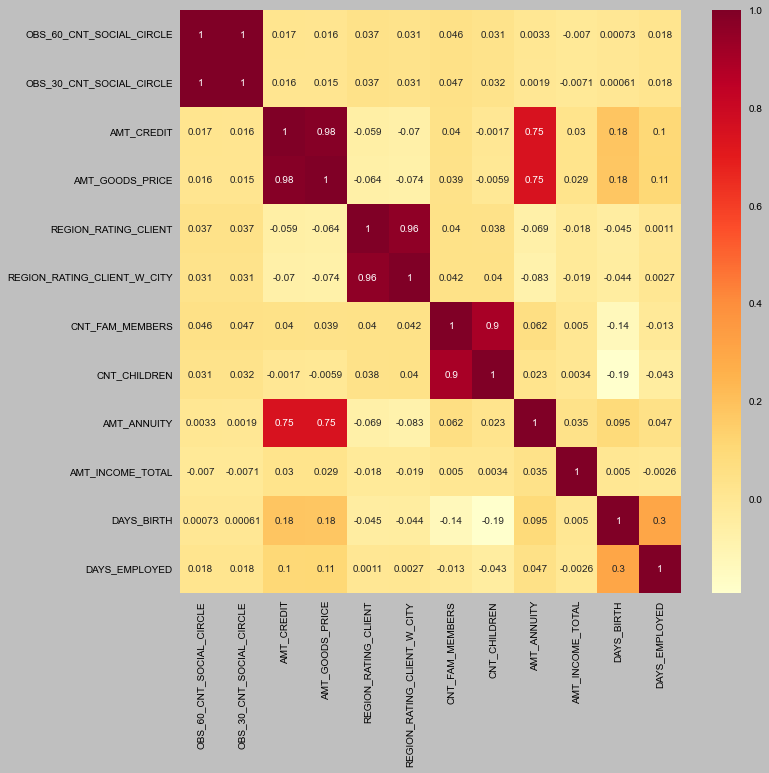

In [153]:
columns = ['OBS_60_CNT_SOCIAL_CIRCLE',
          'OBS_30_CNT_SOCIAL_CIRCLE',
          'AMT_CREDIT',
          'AMT_GOODS_PRICE',
          'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY',
          'CNT_FAM_MEMBERS',
          'CNT_CHILDREN',
          'AMT_ANNUITY',
          'AMT_INCOME_TOTAL',
          'DAYS_BIRTH',
          'DAYS_EMPLOYED']

selected_cols = credit_risk[columns]
corr_matrix = selected_cols.corr()

plt.figure(figsize = [10,10])
sns.heatmap(corr_matrix , annot = True , cmap = 'YlOrRd')
plt.show()

#### Correlation for TARGET == 0

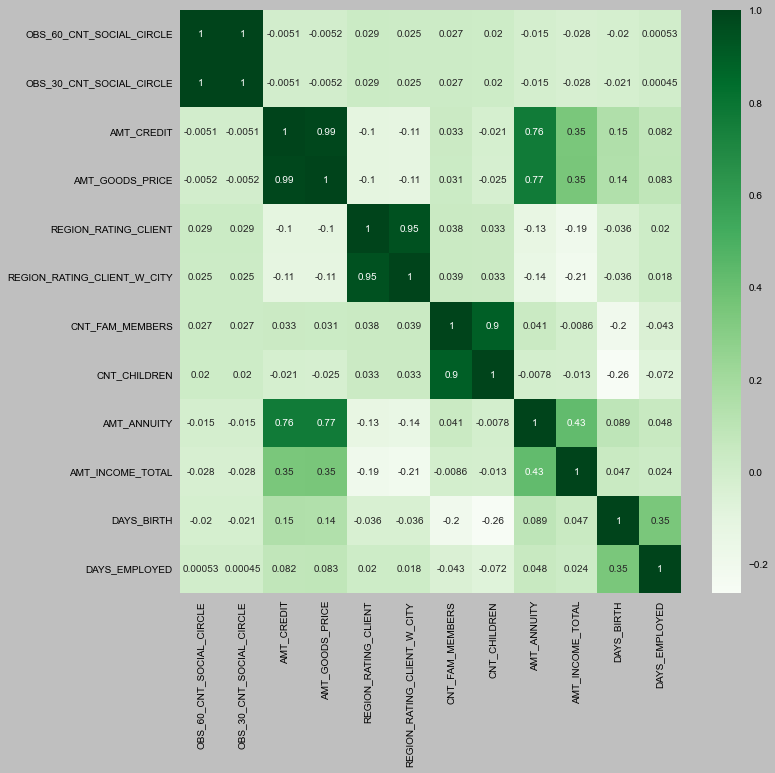

In [154]:
Columns = ['OBS_60_CNT_SOCIAL_CIRCLE',
          'OBS_30_CNT_SOCIAL_CIRCLE',
          'AMT_CREDIT',
          'AMT_GOODS_PRICE',
          'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY',
          'CNT_FAM_MEMBERS',
          'CNT_CHILDREN',
          'AMT_ANNUITY',
          'AMT_INCOME_TOTAL',
          'DAYS_BIRTH',
          'DAYS_EMPLOYED']

SELECTED_COLS = No_credit_risk[Columns]
CORR_MAT = SELECTED_COLS.corr()

plt.figure(figsize = [10,10])
sns.heatmap(CORR_MAT , annot = True , cmap = 'Greens')
plt.show()

# THANK YOU